In [1]:
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
import plotly.express as px

In [3]:
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score

In [23]:
rainfall = pd.read_csv("./data/Annual rainfall at fortaleza Brazil 18491979.csv")
rainfall.rename(columns={'Unnamed: 0':'t'}, inplace=True)
rainfall = rainfall.interpolate()
rainfall.head()

,t,x
0,1,2001
1,2,852
2,3,1806
3,4,1356
4,5,1233


In [24]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from numpy import asarray

In [25]:
n_vars = 1 if type(rainfall) is list else rainfall.shape[1]
cols = list()
for i in range(1, 0, -1):
    cols.append(rainfall.shift(i))
for i in range(0, 1):
    cols.append(rainfall.shift(-i))
# put it all together
agg = pd.concat(cols, axis=1)
agg.dropna(inplace=True)
list_for_forecast = agg.values

In [26]:
len(list_for_forecast)

130

In [27]:
def decision_tree_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = DecisionTreeRegressor(random_state=0)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [28]:
def random_forest_forecast(train, testX):
    train = asarray(train)
    trainX, trainy = train[:, :-1], train[:, -1]
    model = RandomForestRegressor(n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    return yhat[0]

In [29]:
predictions = list()
size = int(len(list_for_forecast) * 0.66)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    yhat = random_forest_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])

error = mean_absolute_error(test[:, -1], predictions)
print("Random Forest error: ", error)

Random Forest error:  389.97871111111107


In [30]:
print("Random Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Random Forest metrics: 
RMSE: 466.550703324444
MAPE: 0.2986929578313002
MAE: 389.97871111111107
R2:  -0.01777889073044303


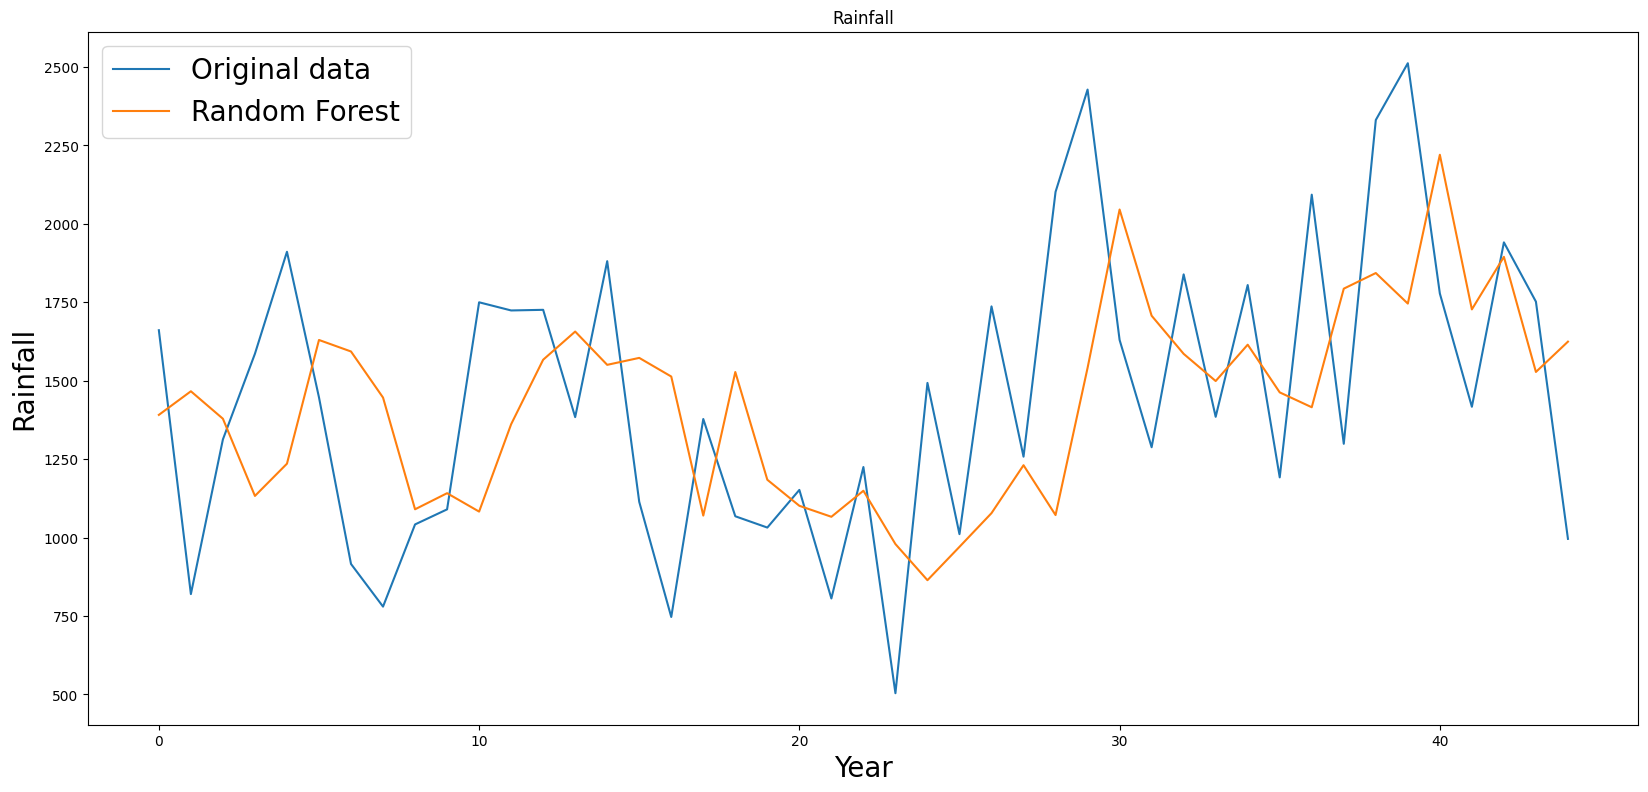

In [32]:
fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Random Forest')
plt.legend(fontsize="20")
plt.title('Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Year', fontsize="20")
plt.show()

In [33]:
predictions = list()
size = int(len(list_for_forecast) * 0.66)
train, test = list_for_forecast[0:size], list_for_forecast[size:len(list_for_forecast)]
history = [x for x in train]

for i in range(len(test)):
    testX, testy = test[i, :-1], test[i, -1]
    yhat = decision_tree_forecast(history, testX)
    predictions.append(yhat)
    history.append(test[i])

In [34]:
print("Decision Forest metrics: ")
print("RMSE:", np.sqrt(mean_squared_error(test[:, -1], predictions)))
print("MAPE:", mean_absolute_percentage_error(test[:, -1], predictions))
print("MAE:", mean_absolute_error(test[:, -1], predictions))
print("R2: ", r2_score(test[:, -1], predictions))

Decision Forest metrics: 
RMSE: 626.5232459995221
MAPE: 0.3729165484259037
MAE: 500.8888888888889
R2:  -0.8353974368508315


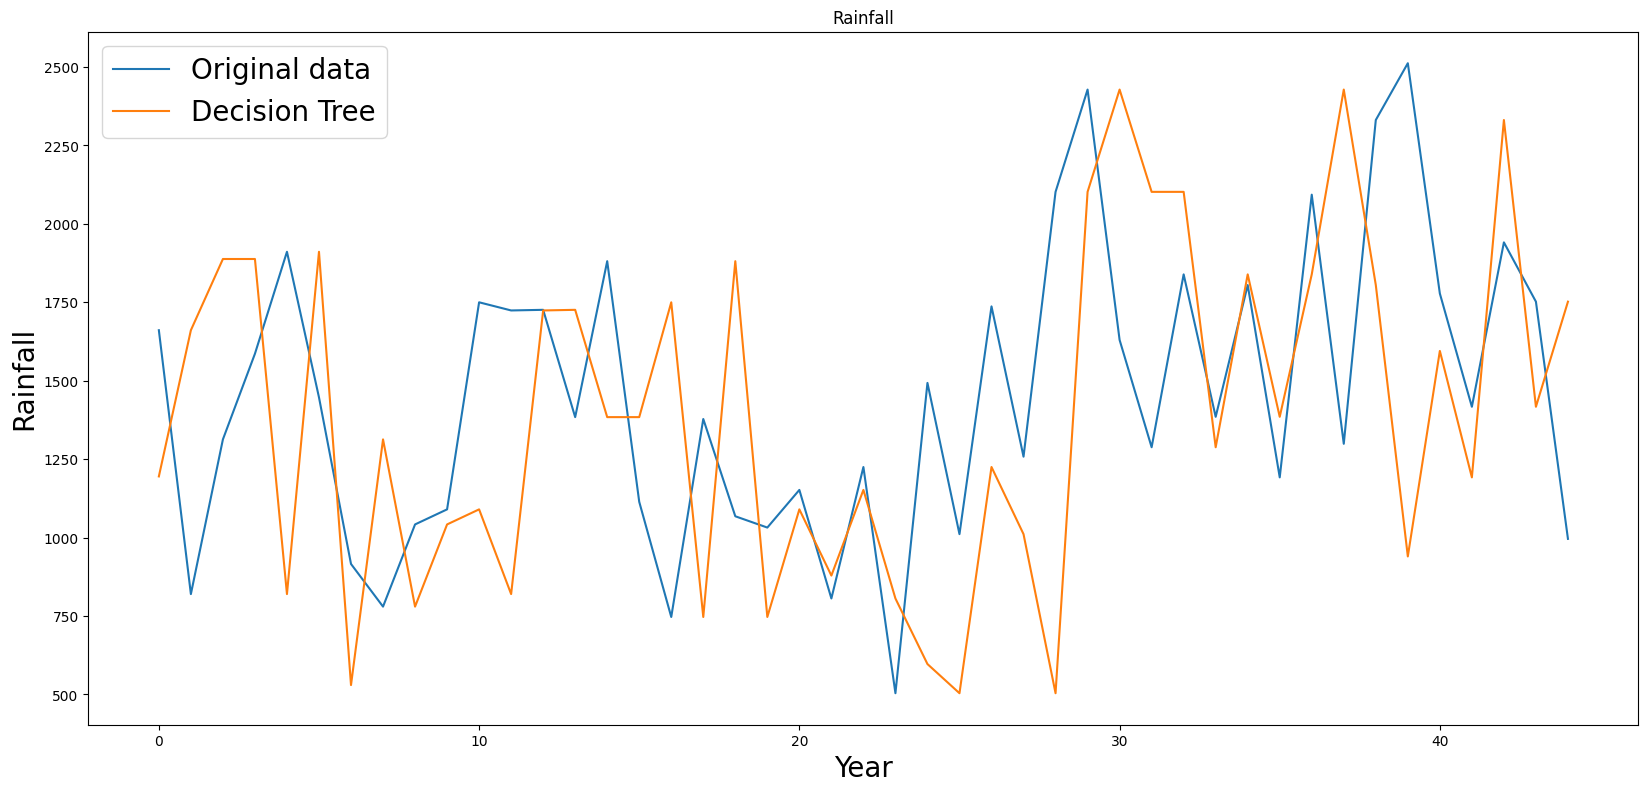

In [35]:
fig = plt.figure(figsize=(20, 9))
plt.plot(test[:, -1], label='Original data')
plt.plot(predictions, label='Decision Tree')
plt.legend(fontsize="20")
plt.title('Rainfall')
plt.ylabel('Rainfall', fontsize="20")
plt.xlabel('Year', fontsize="20")
plt.show()

In [36]:
from sklearn.ensemble import IsolationForest

In [37]:
model = IsolationForest(contamination=0.004)
model.fit(rainfall[['x']])

IsolationForest(contamination=0.004)

In [38]:
rainfall["outliers"] = pd.Series([["no", "yes"][x == -1] for x in model.predict(rainfall[["x"]])])

/var/folders/p5/lrpx83fd6vbch0znz3q6vz4c0000gn/T/ipykernel_28584/3875061825.py:1: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  rainfall["outliers"] = pd.Series([["no", "yes"][x == -1] for x in model.predict(rainfall[["x"]])])


In [39]:
rainfall['x'][rainfall["outliers"] == "yes"]

28    468
Name: x, dtype: int64

In [41]:
fig = px.scatter(rainfall.reset_index(), x='t', y='x', color='outliers')
fig.update_xaxes(rangeslider_visible=True)
fig.show(renderers="plotly_mimetype+jupyterlab+nteract+vscode+notebook+notebook_connected+kaggle+azure+colab+cocalc+databricks+json+png+jpeg+jpg+svg+pdf+browser+firefox+chrome+chromium+iframe+iframe_connected+sphinx_gallery+sphinx_gallery_png")